# Intro
This report for a company aims to filter out of employee survey data which employees are leaving the company and why they are leaving. The following question are therein tackled: 
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
sns.set_palette(sns.color_palette("tab10"))

_departments = pd.DataFrame({'department': ['IT', 'retail', 'logistics', 'marketing', 'support', 'engineering', 'operations', 'sales', 'admin', 'finance'], 'color': ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], 'id': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})
_departments = _departments.set_index('department')

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('./data/employee_churn_data.csv')
df['left_n'] = df['left'].replace(['no', 'yes'], [0, 1])
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,left_n
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,0
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,0
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,0
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,0
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,0


# 1	Turnover per department
## 1.1 Total numbers
The departments with the highest employee turnover are IT & logistics, which are, interestingly, the departments with the least employees. Finance on the other hand has the third least employees but also the smallest turnover rate. IT is known to be a very competitive field what could explain the high turnover rate, but arguably the same might be true for sales, which is the company's biggest department but is amongst the ones with the lowest turnover rates.

In [ ]:
ppl_left = df.groupby('department')['left_n'].sum().sort_values(ascending=False)
ppl_per_dpmt = df.groupby('department')['left_n'].count().sort_values(ascending=False)
ppl_left_pct = (ppl_left/ppl_per_dpmt).sort_values(ascending=False)

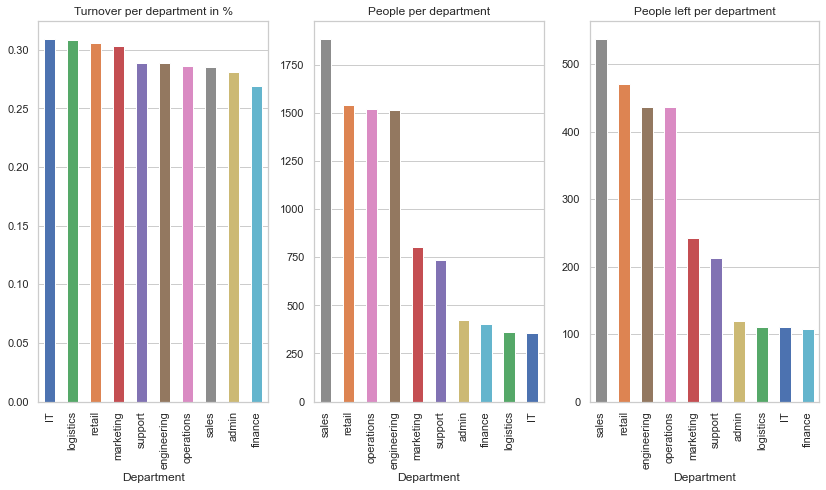

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

_departments = _departments.reindex(index=ppl_left_pct.index)
ppl_left_pct.plot(kind='bar', grid=True, title='Turnover per department in %', ax=ax[0], color=_departments['color'], xlabel='Department').grid(axis='x')

_departments = _departments.reindex(index=ppl_left.index)
ppl_left.plot(kind='bar', grid=True, title='People left per department', ax=ax[2], color=_departments['color'], xlabel='Department').grid(axis='x')

_departments = _departments.reindex(index=ppl_per_dpmt.index)
ppl_per_dpmt.plot(kind='bar', grid=True, title='People per department', ax=ax[1], color=_departments['color'], xlabel='Department').grid(axis='x')

# 2 Reasons for turnover
## 2.1 Department statistics
The average tenure, satisfaction, review results and also the average hours worked per month per department are roughly the same for every department. This indicates, that employee churn can  not be broken down to these department statistics. Interestingly though, IT, the department with the highest churn rate, has also the highest average tenure whilst on the other side finance, the department with the lowest churn rate has the smallest average tenure. 

The salary does also not have an influence on the churn rate. It could be reasoned that people that have a high salary are more likely to stay with the company. Whilst Logistics for example has the lowest percentage of people with high income amongst all departments and is one of the departments with the highest churn rate, the same is for example not true for IT, which has the highest churn rate but also a high percentage of high income earners. 

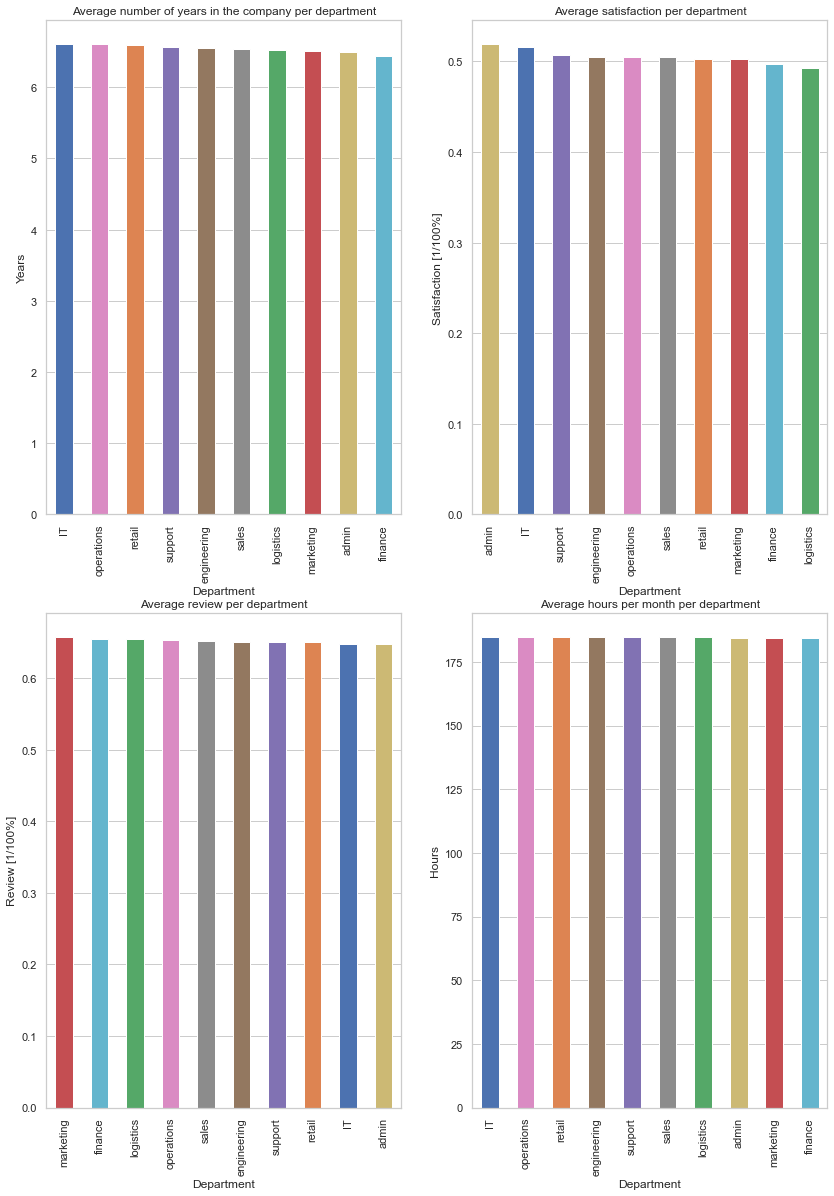

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 20))
ax = ax.ravel()

mean_tenure = df.groupby('department')['tenure'].mean().sort_values(ascending=False)
_departments = _departments.reindex(index=mean_tenure.index)
mean_tenure.plot(kind='bar', ax=ax[0], color=_departments['color'], title='Average number of years in the company per department', xlabel='Department', ylabel='Years').grid(axis='x')

mean_satisfaction = df.groupby('department')['satisfaction'].mean().sort_values(ascending=False)
_departments = _departments.reindex(index=mean_satisfaction.index)
mean_satisfaction.plot(kind='bar', ax=ax[1], color=_departments['color'], title='Average satisfaction per department', xlabel='Department', ylabel='Satisfaction [1/100%]').grid(axis='x')

mean_review = df.groupby('department')['review'].mean().sort_values(ascending=False)
_departments = _departments.reindex(index=mean_review.index)
mean_review.plot(kind='bar', ax=ax[2], color=_departments['color'], title='Average review per department', xlabel='Department', ylabel='Review [1/100%]').grid(axis='x')

mean_hrs = df.groupby('department')['avg_hrs_month'].mean().sort_values(ascending=False)
_departments = _departments.reindex(index=mean_hrs.index)
mean_hrs.plot(kind='bar', ax=ax[3], color=_departments['color'], title='Average hours per month per department', xlabel='Department', ylabel='Hours').grid(axis='x')

plt.show()

In [ ]:
grouped = df.groupby('department')['salary'].value_counts(normalize=True).sort_values(ascending=False)
sal = pd.DataFrame(grouped).rename(columns={'salary': 'salary_mean'}).reset_index().set_index('department')
display(sal[sal['salary'] == 'high'])

,salary,salary_mean
department,,
support,high,0.180952
finance,high,0.174129
marketing,high,0.167082
IT,high,0.165730
sales,high,0.164631
retail,high,0.161583
admin,high,0.158392
operations,high,0.157687
engineering,high,0.155013


## 2.2 Satisfaction & review
The group with a medium salary is overrepresented in the company, the lower and upper ends with low and high salary on the other hand are roughly the same size. On average, the salary does not have an influence on neither the review nor the satisfaction, which indicates, that people in this company are neither motivated by money to work harder (review) or like their jobs more because of the money they get (satisfaction). 

For people leaving the company, the mean value of satisfaction indicates that satisfaction does not have an influence on whether a person leaves the company or not. The distribution is although skewed to lower values of the satisfaction, which indicates that lower satisfaction causes people to leave the company in some cases. Review on the other hand gives clear insights on both metrics: The mean review is higher for people leaving the company than for people staying and also the distribution is skewed to higher values. Assuming fair reviews, this is a bad sign for the company. **No matter the satisfaction, good people are more likely to leave the company.** Other companies will recognizes good people and also good people themselves will know that they have a high market-value when doing good in their job. The company should avoid losing their best people. It still needs to be analyzed, which factors could make good people stay with the company. 

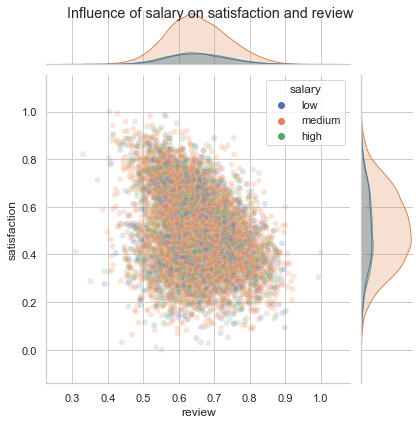

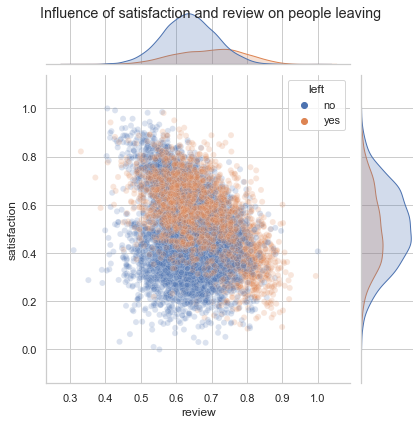

Salary statistics: 


,review,satisfaction
salary,,
high,0.651642,0.502463
low,0.652816,0.504934
medium,0.651663,0.505095



Leaving statistics: 


,review,satisfaction
left,,
no,0.635164,0.505634
yes,0.692262,0.502244


,review,satisfaction
left,,
no,0.017621,-0.003344
yes,-0.192521,0.181614


In [ ]:
# Salary
g = sns.jointplot('review', 'satisfaction', data=df, hue='salary', alpha=0.2)
g.fig.suptitle('Influence of salary on satisfaction and review')
plt.show()

# People leaving
g = sns.jointplot('review', 'satisfaction', data=df, hue='left', alpha=0.2)
g.fig.suptitle('Influence of satisfaction and review on people leaving')
plt.show()

# Salary statistics
salary = df.groupby('salary')['review', 'satisfaction']
print('Salary statistics: ')
display(salary.mean())
print()

# Leaving statistics
leaving = df.groupby('left')['review', 'satisfaction']
print('Leaving statistics: ')
display(leaving.mean())
display(leaving.skew())

## 2.3 Tenure, review & satisfaction
Unfortunately for the company, the trend already seen in the previous chapter can be confirmed when comparing review and satisfaction with the tenure, the time people stay in the company. The trend is clear: **Good people leave the company after a short time.** People being in their second or third year with the company and left the company this year had average reviews of more the 80%, whilst the people that have been there and stayed reached on average 75% and 63%. The people that stayed with the company were although much more satisfied with their job than the people who left. People that stayed with their company for a long time (>10 years) had the highest satisfaction. Reviews on the other hand worsen the longer people stay in the company. The problem is clear: **the company loses their best people who are often not satisfied with their job. People that stay are oftentimes not as good as the people that left, but at least more satisfied.** 

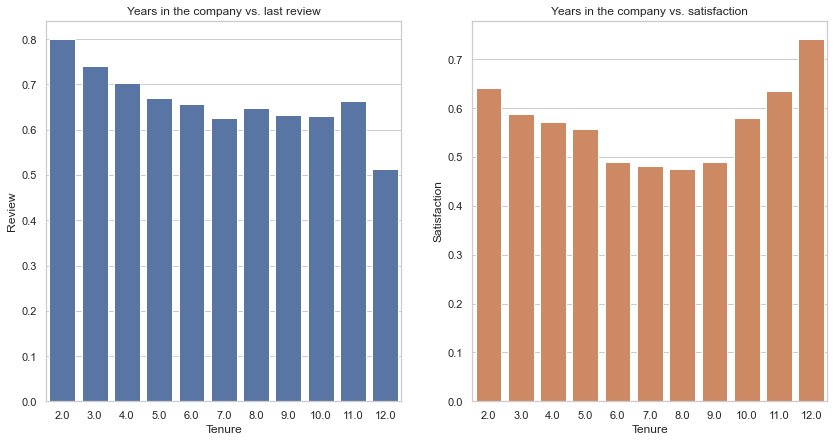

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

tenure = df.groupby('tenure')[['review', 'satisfaction']]

# Review
sns.barplot(x=tenure.mean()['review'].index, y=tenure.mean()['review'], ax=ax[0], color='C0')
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Review')
ax[0].set_title('Years in the company vs. last review')

# Satisfaction
sns.barplot(x=tenure.mean()['satisfaction'].index, y=tenure.mean()['satisfaction'], ax=ax[1], color='C1')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Satisfaction')
ax[1].set_title('Years in the company vs. satisfaction')

plt.show()

In [ ]:
display(df.groupby(['tenure', 'left'])[['review', 'satisfaction']].mean())

review  satisfaction
tenure left                        
2.0    no    0.749048      0.777297
       yes   0.826569      0.573526
3.0    no    0.627374      0.703451
       yes   0.842635      0.484267
4.0    no    0.642387      0.644517
       yes   0.811051      0.439019
5.0    no    0.636865      0.602659
       yes   0.775686      0.412456
6.0    no    0.635678      0.516628
       yes   0.736686      0.385273
7.0    no    0.633790      0.408793
       yes   0.614530      0.604135
8.0    no    0.632873      0.430604
       yes   0.668647      0.533306
9.0    no    0.632927      0.495578
       yes   0.663276      0.293466
10.0   no    0.630845      0.579281
11.0   no    0.663696      0.634543
12.0   no    0.513217      0.741743

## 2.4 Salaries, boni, projects & promotions
We already discovered that the **salary** has no influence on the review and the satisfaction of the company's employees. The reasoning that following this, the salary should also have no effect on people leaving the company could be proven by analyzing the salary fractions. The distribution of the salary categories is roughly the same for people who stayed with the company and people who left the company. **Therefore, the salary has no influence on whether people are about to leave or not.**

The same is true for **boni** paid. People that stayed, received a bonus 1% more often than people that left the company. **A difference can therefore be clearly seen. Although, as this difference is small relative to the percentage of people that received a bonus, it is not likely that this influences peoples quitting decisions.**

**Projects** are also equally distributed between people that stayed and left and **are therefore no factor for leaving decisions.**

More significant is the difference in amount of people being promoted. Even though, the absolute difference is again roughly 1%, this has to be seen relative to the total percentage of people being promoted. In this cirumstance, 1% is a significant difference. **It might therefore be, that people are frustrated not to be promoted and therefore leave the company.** 

In [ ]:
# Salary
salary_left = df.groupby('left')['salary'].value_counts(normalize=True)
print('Salaries:')
display(salary_left)

# Boni
boni_left = df.groupby('left')['bonus'].mean()
print('Boni')
display(boni_left)

# Projects
projects_left = df.groupby('left')['projects'].mean()
print('Projects')
display(projects_left)

# Promotions
promoted_left = df.groupby('left')['promoted'].mean()
print('Promoted')
display(promoted_left)

Salaries:


left  salary
no    medium    0.689757
      high      0.163706
      low       0.146536
yes   medium    0.700790
      high      0.158764
      low       0.140445
Name: salary, dtype: float64

Boni


left
no     0.215068
yes    0.204741
Name: bonus, dtype: float64

Projects


left
no     3.279455
yes    3.263649
Name: projects, dtype: float64

Promoted


left
no     0.034340
yes    0.020474
Name: promoted, dtype: float64

## 2.5 Promotions, review & satisfaction
The average reviews and also the time people already spent in the company have no influence on whehter they are promoted or not. On the other, the same scheme as before can be noticed as people with higher reviews are more likely to leave the company regardsless of being promoted or not. Here it is interesting to have a look at the satisfaction: Whilst it is the same for people who did not get promoted (50%), People who got promoted and left the company have a significantly lower satisfaction. This might indicate **that people that got promoted and left the company did it, because they did not like their new role.** It is unlikely that the majority of this people left because they did not good in their new position as those people received the highest average reviews.

In [ ]:
promoted_rev_sat = df.groupby('promoted')[['review', 'satisfaction']].mean()
print('Mean review: ', df['review'].mean())
display(promoted_rev_sat)

promoted_tenure = df.groupby('promoted')['tenure'].mean()
display(promoted_tenure)

promoted_left_rev_sat = df.groupby(['promoted', 'left'])[['review', 'satisfaction']].mean()
display(promoted_left_rev_sat)

Mean review:  0.6518263249473046


,review,satisfaction
promoted,,
0,0.651798,0.504972
1,0.652733,0.494146


promoted
0    6.555832
1    6.567474
Name: tenure, dtype: float64

review  satisfaction
promoted left                        
0        no    0.635040      0.505790
         yes   0.691888      0.503017
1        no    0.638628      0.501243
         yes   0.710141      0.465257

## 2.6 Work hours, promotions, review & satisfaction
The **hours an employee worked per month do not have an influence** on whether they leave the company or are promoted. 

When comparing the average work hours against the review of the employees, two clusters that are not clearly separated but still different can be identified. This clusters can also be seen when splitting the employees by salary categories. This once again manifests that the **salary has no influence on whether people leave or not.**

left
no     184.637605
yes    184.719730
Name: avg_hrs_month, dtype: float64

promoted
0    184.663175
1    184.610215
Name: avg_hrs_month, dtype: float64

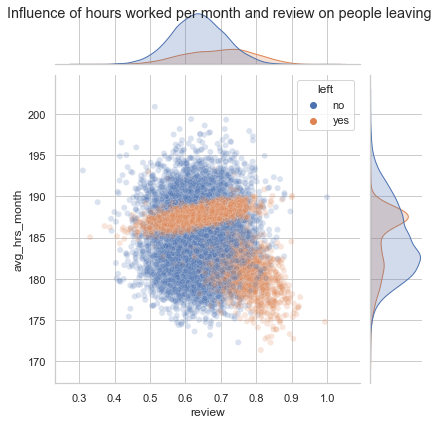

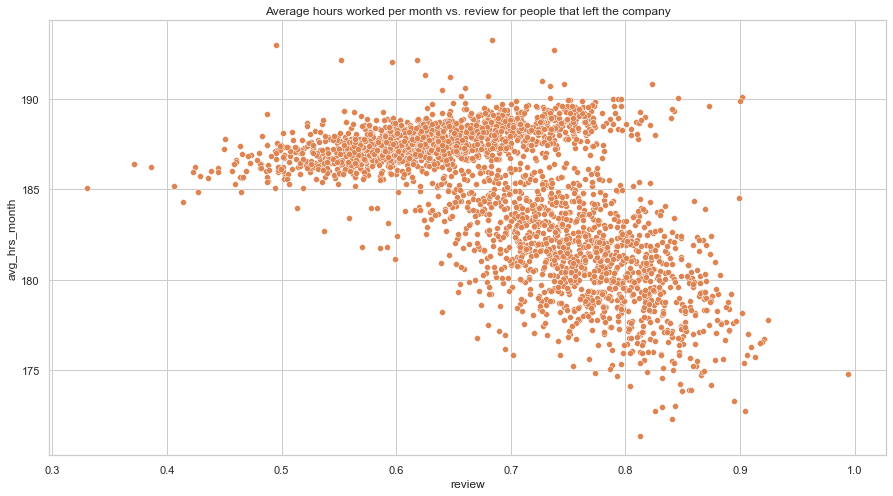

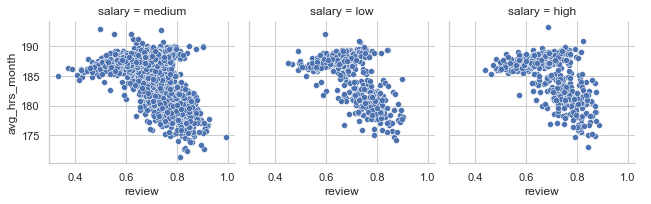

In [ ]:
# Work hours influence on people leaving
hours_left = df.groupby('left')['avg_hrs_month'].mean()
display(hours_left)

# Work hours influence on people being promoted
hours_promoted = df.groupby('promoted')['avg_hrs_month'].mean()
display(hours_promoted)

# Review vs. work hours
g = sns.jointplot('review', 'avg_hrs_month', data=df, hue='left', alpha=0.2)
g.fig.suptitle('Influence of hours worked per month and review on people leaving')
plt.show()

# Hours of people that left
df_left = df[df.left_n == 1]
g = sns.scatterplot('review', 'avg_hrs_month', data=df_left, color='C1')
g.set_title('Average hours worked per month vs. review for people that left the company')
plt.show()

# Hours of people that left by salary
g = sns.FacetGrid(df_left, col='salary')
g.map(sns.scatterplot, 'review', 'avg_hrs_month')
g.add_legend()
plt.show()

## 2.6.1 Cluster separation
When trying to find out what makes the two clusters observed in the previous chapter different, an interesting behavior can be noticed: Irregardless of review, people with higher satisfaction tend to work on average 3 hours more per month than people with lower satisfaction. On the other side, the people that are more satisfied have worse reviews by almost **10%**.

Also in this case, the separation can not be made based on salary. 

What can clearly be seen though is that **the longer people are in the company, the more hours they work.** Data gives no evidence of this, but it is very likely that **these people are in senior positions** and therefore need to work more. Also not covered by the data is the reason for people quitting. The compactness of the cluster which works more and is on average also more satisfied can likely be explained by tenure: **This people have left the company because of retirement!**

When asuming that most of the people that stayed with the company for more than 7 years left because of retirement, the satisfaction makes a clear difference. People who left the company probably not for retirement are satisfied by roughly 16% less. On the other hand, they have a review which is on average 12% better than the ones of people who left the company after being with them for more than 7 years. 

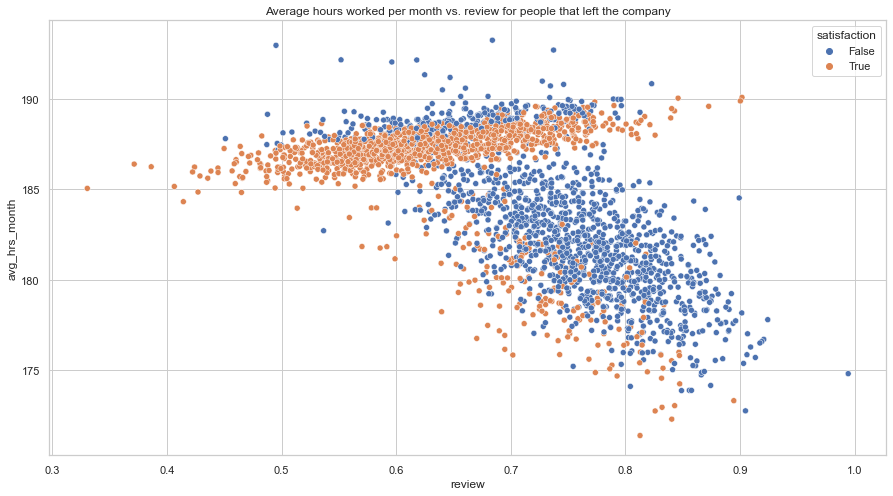

Average hours of more satisfied people:  186.2832717870459
Average hours of less satisfied people:  183.26461681848042

Mean review of more satisfied people:  0.6410839615856309
Mean review of less satisfied people:  0.7398909086861596



'Average salary of more satisfied people: '

medium    0.694486
high      0.161699
low       0.143815
Name: salary, dtype: float64

'Average salary of less satisfied people: '

medium    0.706657
high      0.156033
low       0.137309
Name: salary, dtype: float64

In [ ]:
bins = df_left['satisfaction'] >= 0.5
g = sns.scatterplot('review', 'avg_hrs_month', data=df_left, hue=bins)
g.set_title('Average hours worked per month vs. review for people that left the company')
plt.show()

print('Average hours of more satisfied people: ', df_left[bins]['avg_hrs_month'].mean())
print('Average hours of less satisfied people: ', df_left[~bins]['avg_hrs_month'].mean())
print()

print('Mean review of more satisfied people: ', df_left[bins]['review'].mean())
print('Mean review of less satisfied people: ', df_left[~bins]['review'].mean())
print()

display('Average salary of more satisfied people: ', df_left[bins]['salary'].value_counts(normalize=True))
display('Average salary of less satisfied people: ', df_left[~bins]['salary'].value_counts(normalize=True))

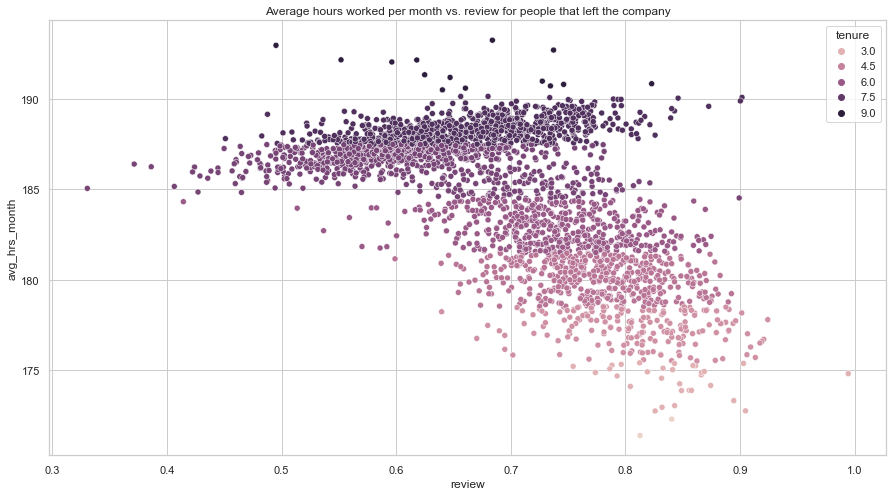

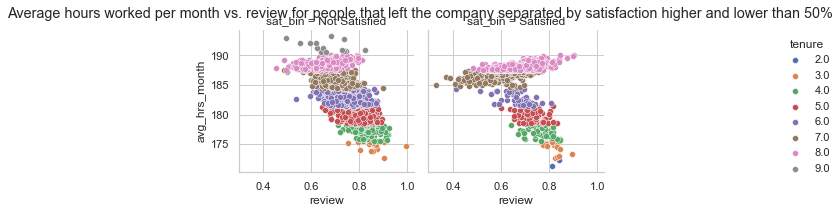

long_tenure
False    0.407495
True     0.566399
Name: satisfaction, dtype: float64

long_tenure
False    0.766830
True     0.641771
Name: review, dtype: float64

In [ ]:
df_left['sat_bin'] = 'Satisfied'
df_left['sat_bin'][~bins] = 'Not Satisfied'
g = sns.scatterplot('review', 'avg_hrs_month', data=df_left, hue='tenure')
g.set_title('Average hours worked per month vs. review for people that left the company')
plt.show()

g = sns.FacetGrid(df_left, col='sat_bin', hue='tenure')
g.map(sns.scatterplot, 'review', 'avg_hrs_month')
g.fig.suptitle('Average hours worked per month vs. review for people that left the company separated by satisfaction higher and lower than 50%')
g.add_legend()
plt.show()

df_left['long_tenure'] = df_left['tenure'] >= 7
satisfaction = df_left.groupby('long_tenure')['satisfaction'].mean()
display(satisfaction)
review = df_left.groupby('long_tenure')['review'].mean()
display(review)

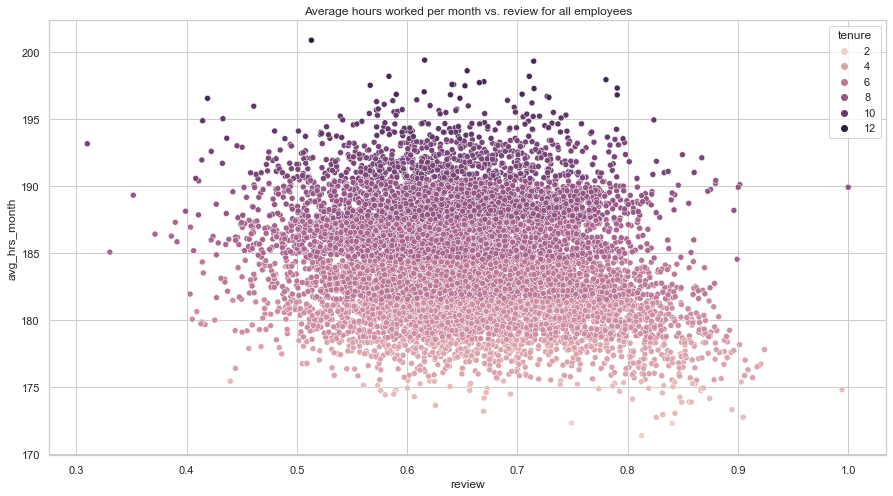

In [ ]:
g = sns.scatterplot('review', 'avg_hrs_month', data=df, hue='tenure')
g.set_title('Average hours worked per month vs. review for all employees')
plt.show()

# Conclusion and suggestions
The company's problem is clear: people are leaving them and often the people leaving did good on their reviews, which makes things even worse for the company. There are two major groups of people leaving: 

- One group has been with the company for a long time, works more hours than the average, is very satisfied with their job but also did not have a good score on their last reviews. Even though there is no clear hint in the data, it is obvious that **the majority of this group left the company for retirement.** 
- The other group has not been with the company for very long (roughly 2-4 years), does not work as many hours as the people from the first group, does very good on the reviews but is not very satisfied in their job. **These people leave for other companies, the majority probably because the environment at the current company was not good for them or other companies recognized their talent and offered them a better position.** 

As the first group can not be kept in the company, the focus must be on the second group. With this group, it will be essential to raise the satisfaction of the people. Monetary issues like the salary and boni paid do not have an influence on their decision, therefore simply raising their salaries will not do the job. One suggestion is to improve the culture and the work environment, parameters that can not be measured in numbers and therefore not be represented by a data analysis. Promotions also showed to have an effect, as people who got promoted left the company less frequently than people that did not get promoted. It is to note that people who got promoted and afterwards left the company had the best reviews compared to people that also got promoted but stayed and also compared to people that did not get promoted. Although, their satisfaction was significantly lower. The company should find out the reasons and try to improve in this point. 

In general, it will be essential to do better for the company in order to be able to keep their best people. As not every body can get promoted, the focus should be on social improvements so that the average satisfaction of the people that are now leaving the company can be improved. 